## Time Series EDA
- Single continuous variable over (uniformly distributed) time
- Understand temporal behavior of data: trend and seasonality, cycle
- Identify underlying distribution and nature of temporal processes producing data

#### Setup
°F = (K - 273.15) x 1.8000 + 32.00

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
# read csv file. Specify 'datetime' column as index column, parse dates and sort index

df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


In [3]:
df.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


- **seasonality**: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality  
    - Quite common in economic time series. It is less common in engineering and scientific data.
    - Can help us understand underlying dynamics


- **trend**: long term upwards or downwards movement  
- **cycle**: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

### Data Splitting

- Ideally all splits contain a season
- Human-based
- Percentage based
- Cross Validation

### Percentage-Based

In [4]:
# check shape of data
df.shape

(45252, 1)

In [5]:
# Lets use 70/30 train test split %

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)
test_start_index #(13576 is test, all 31676 is train)

31676

In [7]:
train.shape

(31676, 1)

In [8]:
test.shape

(13576, 1)

In [6]:
# create train and test dataframe

train = df[:test_start_index] # everything up (not including) to the test_start_index (70)
                              # do validate too 
test = df[test_start_index:] # everything from the test_start_index to the end (30) 

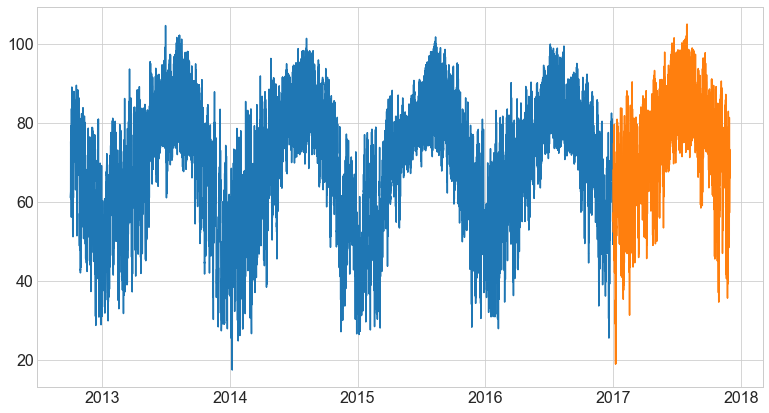

In [12]:
# lets plot train and test
plt.plot(train.index, train)
plt.plot(test.index, test)

### Human-Based

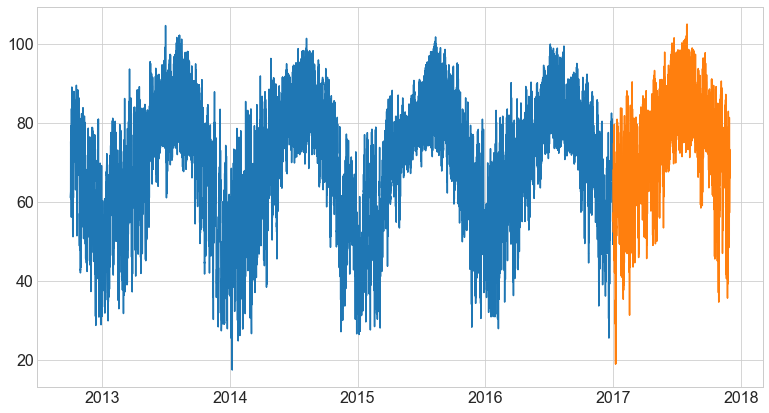

In [11]:
# Anything upto (and including) 2016 as train and rest as test

train = df[:'2016'] # includes 2016
test = df['2017']

# plot the train and test
plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

### Sklearn Cross-validation: 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

Visuals:
https://github.com/scikit-learn/scikit-learn/issues/14376

## Visualizations

In [13]:
# we will do visualization on train only:
train.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [14]:
# create a series called 'y'

y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

### Don't consider the time series

<AxesSubplot:ylabel='Frequency'>

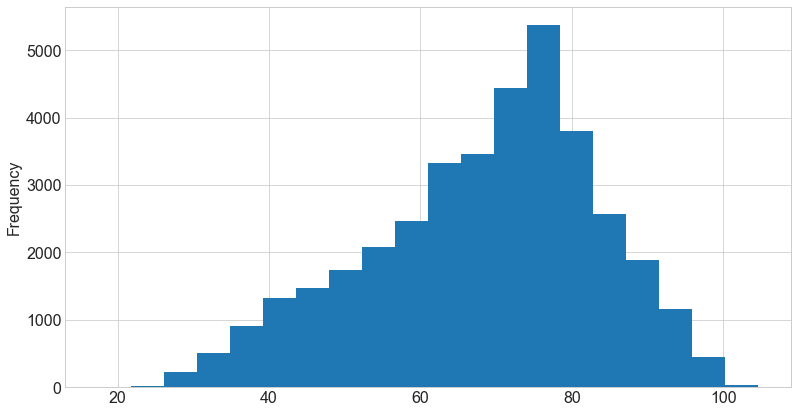

In [15]:
# plot a histogram of temperature
y.plot.hist(bins= 20)

- by month
- by weekday

In [16]:
y.index.month

Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='datetime', length=37259)

In [17]:
# make new column named month
train['month'] = y.index.month

<ipython-input-17-6944ed8e700e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = y.index.month


In [18]:
train.head()

,temp,month
datetime,,
2012-10-01 13:00:00,61.052000,10
2012-10-01 14:00:00,61.076568,10
2012-10-01 15:00:00,61.139294,10
2012-10-01 16:00:00,61.202020,10
2012-10-01 17:00:00,61.264747,10


<AxesSubplot:xlabel='month'>

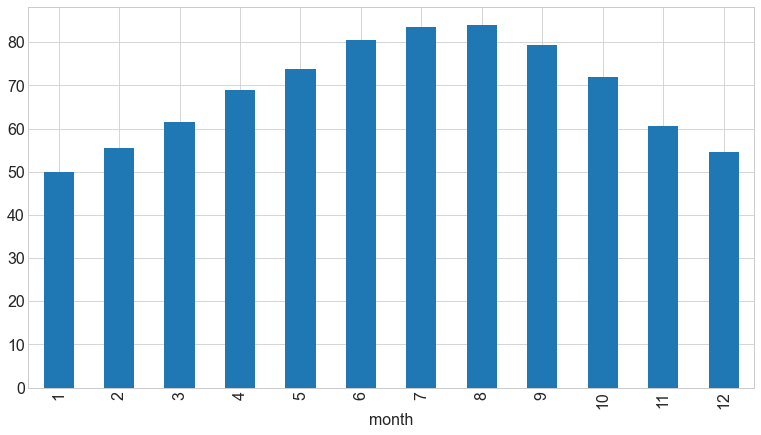

In [21]:
# Plot mean temperature by month (bar plot)
train.groupby('month').temp.mean().plot.bar()

In [22]:
# make new column weekday
train['weekday'] = y.index.day_name()

<ipython-input-22-e5c6cdb7c1e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday'] = y.index.day_name()


In [24]:
train.head()

,temp,month,weekday
datetime,,,
2012-10-01 13:00:00,61.052000,10,Monday
2012-10-01 14:00:00,61.076568,10,Monday
2012-10-01 15:00:00,61.139294,10,Monday
2012-10-01 16:00:00,61.202020,10,Monday
2012-10-01 17:00:00,61.264747,10,Monday


<AxesSubplot:xlabel='weekday'>

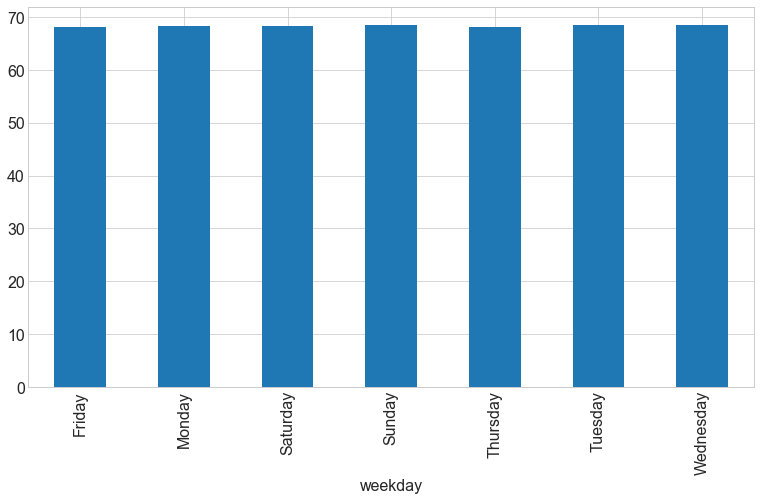

In [23]:
# Plot mean temperature by weekday
train.groupby('weekday').temp.mean().plot.bar()

#### What if we want to visualize more than just the mean temperature?

In [25]:
train.groupby('weekday').describe()

temp                                                      \
            count       mean        std      min       25%        50%   
weekday                                                                 
Friday     5328.0  68.170992  15.382317  24.7820  58.21550  71.105000   
Monday     5315.0  68.326222  15.330057  24.6560  58.54190  70.952000   
Saturday   5328.0  68.376767  14.682317  26.4740  59.34200  70.159805   
Sunday     5304.0  68.551504  14.673979  27.8780  59.68400  70.195400   
Thursday   5328.0  68.195680  15.571015  27.2078  57.59600  71.348000   
Tuesday    5328.0  68.417980  15.380445  17.4200  58.50950  71.432678   
Wednesday  5328.0  68.481428  15.146799  26.1500  57.98975  71.280884   

                                 month                                     \
                 75%       max   count      mean       std  min  25%  50%   
weekday                                                                     
Friday     78.476000  102.0920  5328.0  6.747748  3.518541  1.0  4.0  7.0   
Monday     79.034000  101.5160  5315.0  6.825588  3.501957  1.0  4.0  7.0   
Saturday   78.587375  101.8040  5328.0  6.779279  3.520021  1.0  4.0  7.0   
Sunday     78.836000  104.5400  5304.0  6.787330  3.506630  1.0  4.0  7.0   
Thursday   79.235660  102.0380  5328.0  6.765766  3.528736  1.0  4.0  7.0   
Tuesday    79.160000  101.6600  5328.0  6.815315  3.511847  1.0  4.0  7.0   
Wednesday  79.206350  100.7138  5328.0  6.788288  3.510321  1.0  4.0  7.0   

                       
            75%   max  
weekday                
Friday     10.0  12.0  
Monday     10.0  12.0  
Saturday   10.0  12.0  
Sunday     10.0  12.0  
Thursday   10.0  12.0  
Tuesday    10.0  12.0  
Wednesday  10.0  12.0

<AxesSubplot:xlabel='weekday', ylabel='temp'>

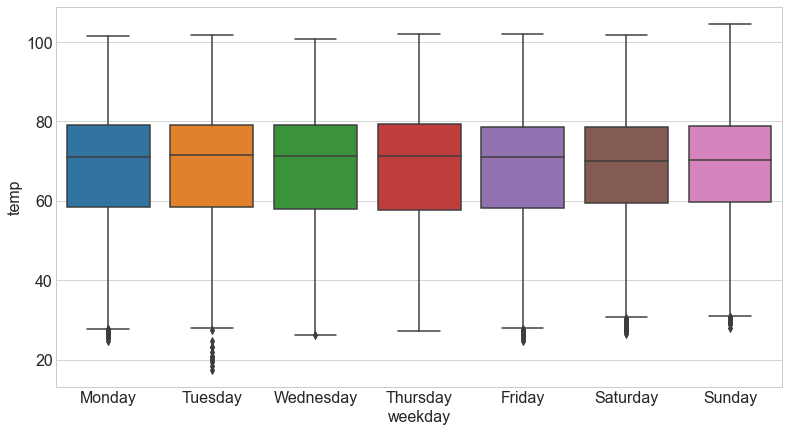

In [26]:
sns.boxplot(data = train, x = 'weekday', y = 'temp')

In [ ]:
# Anything interesting in the chart above?
 # - there are alot of wide distributed outliers on Tuesdays. 
 # - Saturdqays and Sundays seem to have lower averge temps. 
 # - The majority of outliers are on the low temp end.

# Would the monthly boxplot look different?
 # - Temps peak in the months July and August
 # - Within each month there is more variation in the fall and winter than in the spring and summer.


<AxesSubplot:xlabel='month', ylabel='temp'>

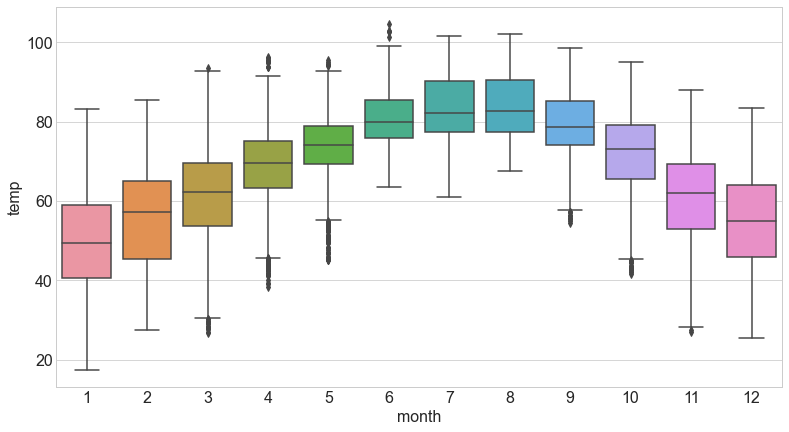

In [27]:
sns.boxplot(data = train, x = 'month', y = 'temp')

### Visualize the target over time

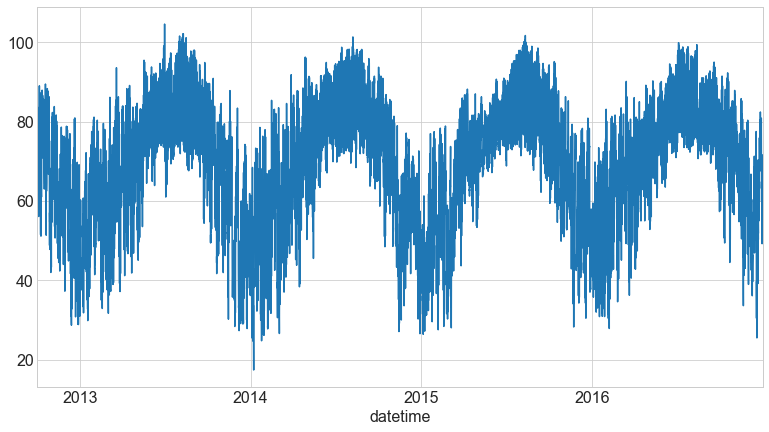

In [28]:
y.plot();

<AxesSubplot:title={'center':'6 hour average'}, xlabel='datetime'>

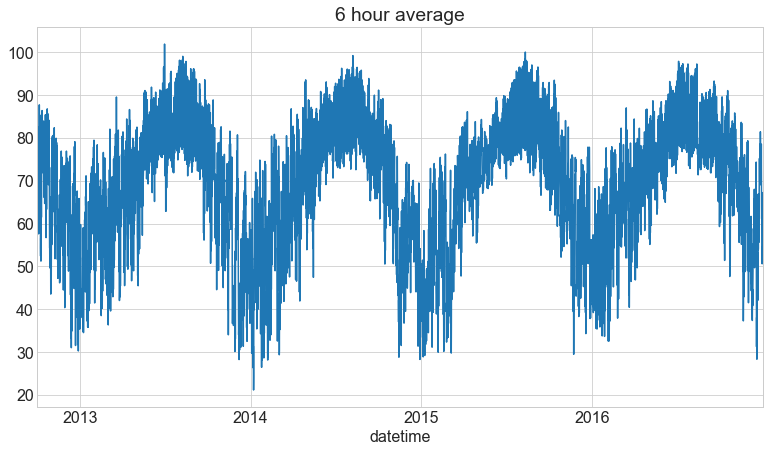

In [29]:
y.resample('6H').mean().plot(title='6 hour average')

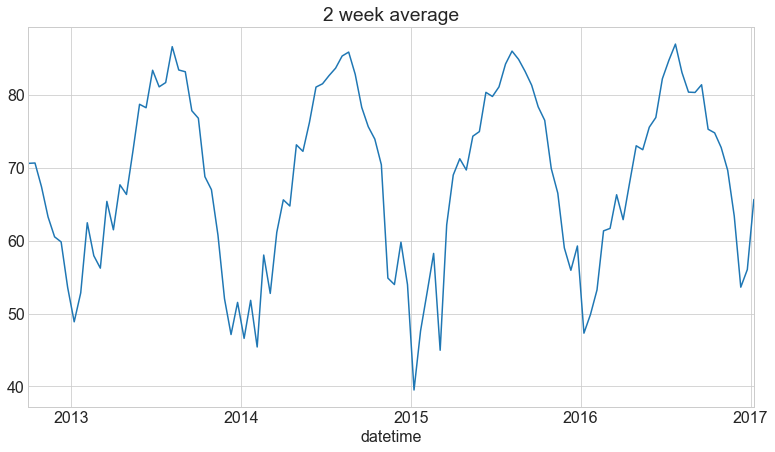

In [30]:
y.resample('2W').mean().plot(title='2 week average');

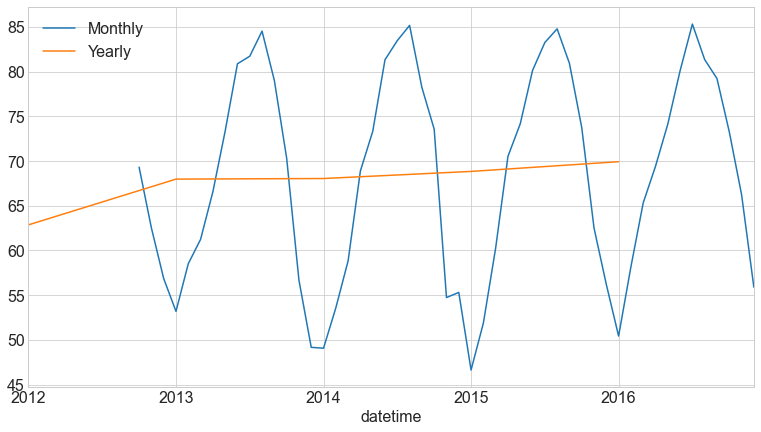

In [31]:
y.resample('M').mean().plot(label = 'Monthly')
y.resample('Y').mean().plot(label = 'Yearly')
plt.legend()

<AxesSubplot:xlabel='datetime'>

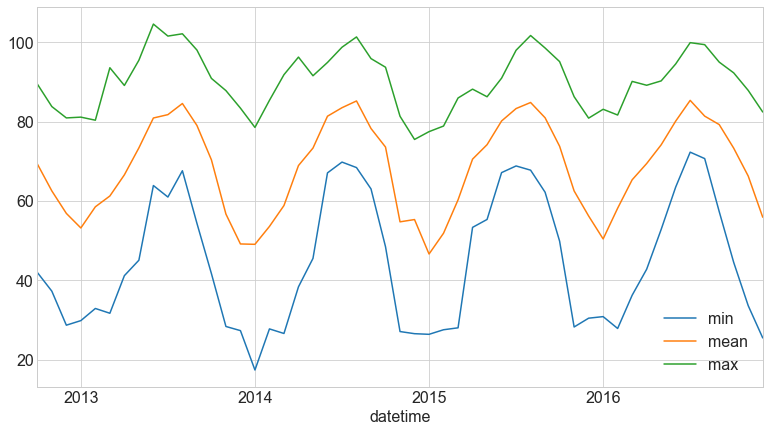

In [32]:
y.resample('M').agg(['min', 'mean', 'max']).plot()


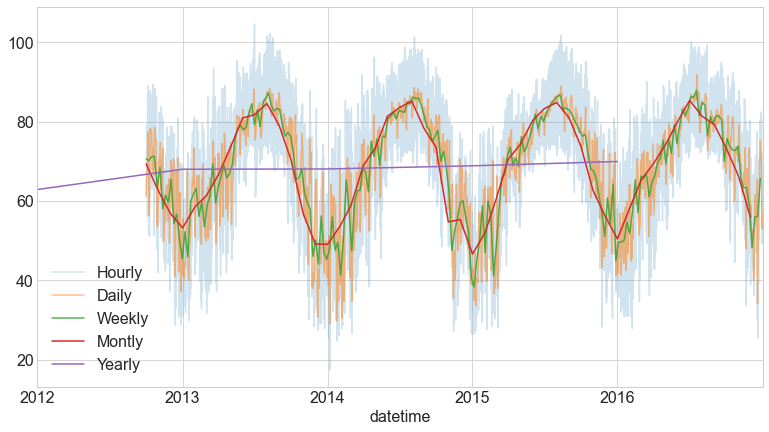

In [33]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [ ]:
#### We can reduce noise by resampling data the data to longer frequencies.

##Seasonaility to Trend


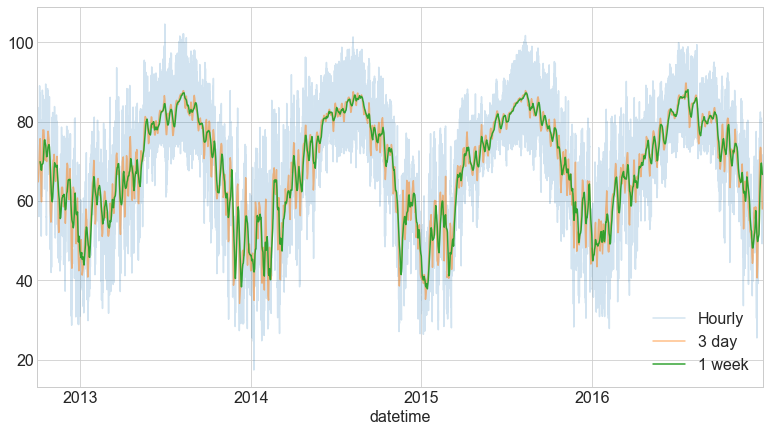

In [34]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Visualize change over time

<AxesSubplot:title={'center':'Average week-to-week change in temperature'}, xlabel='datetime'>

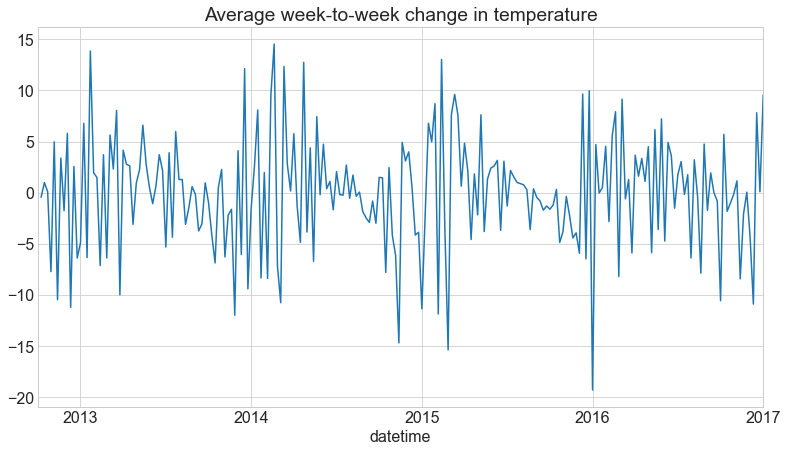

In [35]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')

<AxesSubplot:title={'center':'Average month-to-month change in temperature'}, xlabel='datetime'>

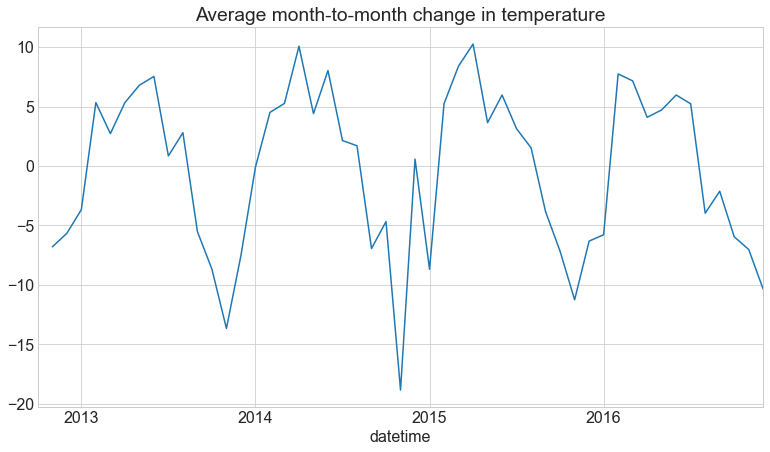

In [36]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')

### Seasonal Plot
- comparison of multiple years together.

<AxesSubplot:xlabel='datetime'>

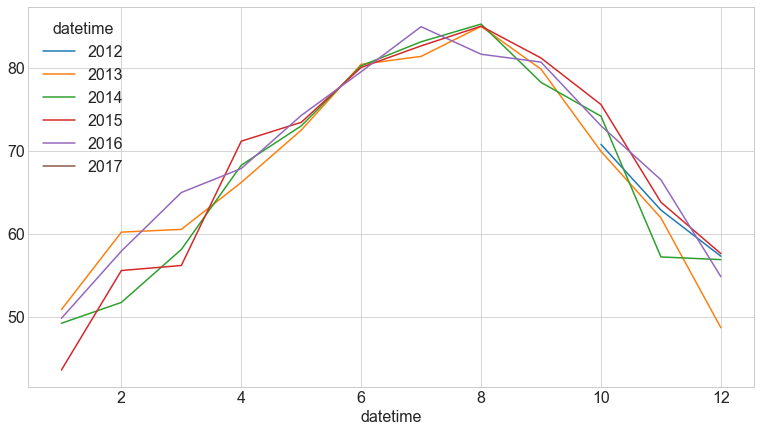

In [65]:
# unstack is similar to pivot_table. It turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

### Seasonal Subseries Plot
A seasonal subseries plot shows the change year-over-year within each month.

In [63]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.779215,62.852442,57.284423
2013,50.849542,60.189964,60.523176,66.182929,72.486630,80.429431,81.383677,85.001189,79.841749,69.925618,61.907006,48.664539
2014,49.201095,51.716134,58.099921,68.259795,73.004662,80.251340,83.145810,85.280057,78.247873,74.174320,57.200017,56.876244
2015,43.564503,55.561321,56.166173,71.160547,73.430169,80.052189,82.651089,85.026941,81.189978,75.576884,63.800742,57.597368
2016,49.801432,57.898264,64.968245,67.861420,74.259606,79.538780,84.964873,81.643927,80.690961,73.016267,66.504138,54.819498
2017,65.640625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


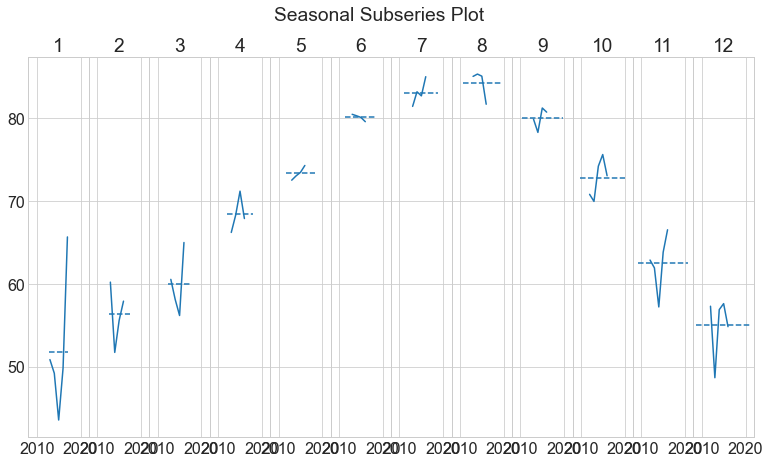

In [64]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.

- Do the data exhibit a seasonal pattern?
- What is the nature of the seasonality?
- Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
- Are there any outliers once seasonality has been accounted for?

- Should I use box plot instead?

### What if seasonality is not that readily apparent?

Is there a seasonality in this data?

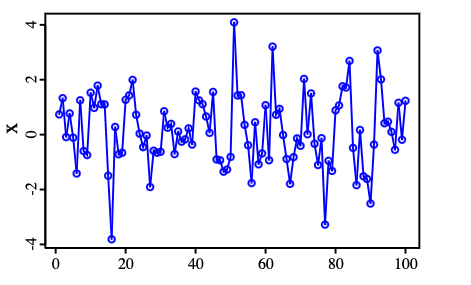

### Lag plot

In [37]:
y.shift(-1)

datetime
2012-10-01 13:00:00    61.076568
2012-10-01 14:00:00    61.139294
2012-10-01 15:00:00    61.202020
2012-10-01 16:00:00    61.264747
2012-10-01 17:00:00    61.327473
                         ...    
2016-12-31 19:00:00    68.216000
2016-12-31 20:00:00    70.664000
2016-12-31 21:00:00    71.348000
2016-12-31 22:00:00    71.600000
2016-12-31 23:00:00          NaN
Name: temp, Length: 37259, dtype: float64

Text(0.5, 1.0, 'Lag plot with lag = 1')

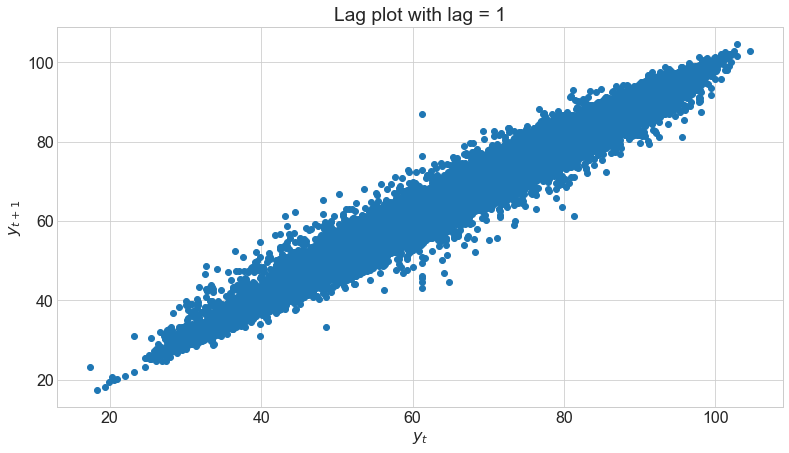

In [38]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

<AxesSubplot:xlabel='temp', ylabel='temp_next_day'>

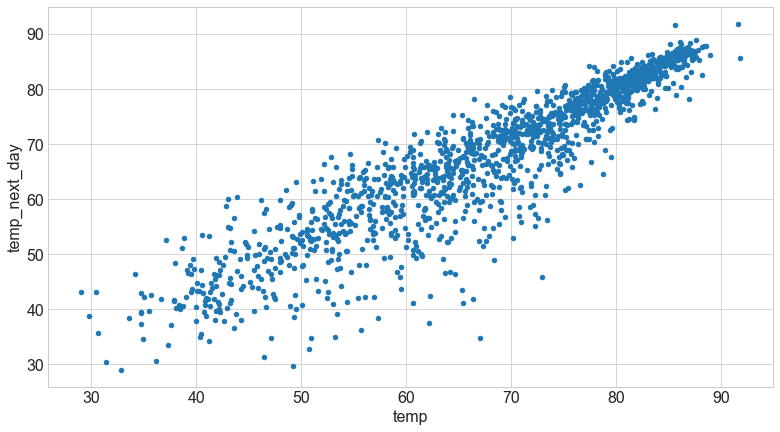

In [39]:
daily = train.resample('D').mean()
daily['temp_next_day'] = daily.temp.shift(-1)
daily.plot.scatter(x='temp', y='temp_next_day')

In [40]:
weekly = train.resample('W').mean()
weekly['temp_next_week'] = weekly.temp.shift(-1)

weekly

,temp,month,temp_next_week
datetime,,,
2012-10-07,70.595201,10.000000,70.152821
2012-10-14,70.152821,10.000000,71.138375
2012-10-21,71.138375,10.000000,71.230464
2012-10-28,71.230464,10.000000,63.510554
2012-11-04,63.510554,10.571429,68.482625
...,...,...,...
2016-12-04,59.062094,11.571429,48.163625
2016-12-11,48.163625,12.000000,55.979132
2016-12-18,55.979132,12.000000,56.073143


<AxesSubplot:xlabel='temp', ylabel='temp_next_week'>

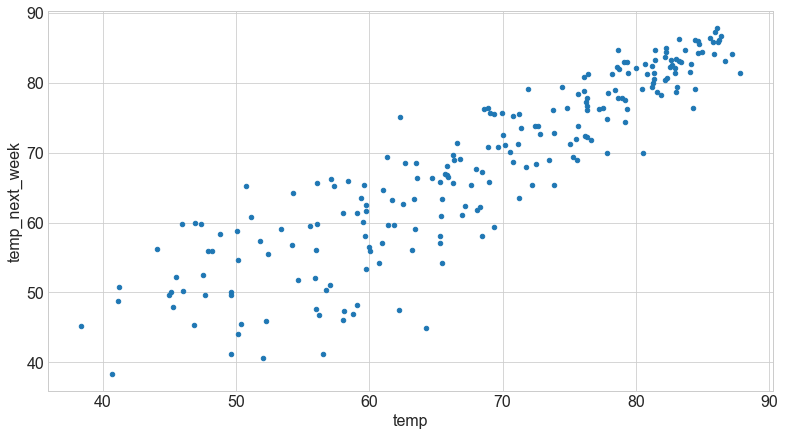

In [41]:
weekly.plot.scatter(x='temp', y='temp_next_week')

,this_week,month,12_weeks_out
datetime,,,
2012-10-07,70.595201,10.000000,50.376741
2012-10-14,70.152821,10.000000,45.473616
2012-10-21,71.138375,10.000000,52.252877
2012-10-28,71.230464,10.000000,45.907936
2012-11-04,63.510554,10.571429,59.763739
...,...,...,...
2016-12-04,59.062094,11.571429,NaN
2016-12-11,48.163625,12.000000,NaN
2016-12-18,55.979132,12.000000,NaN


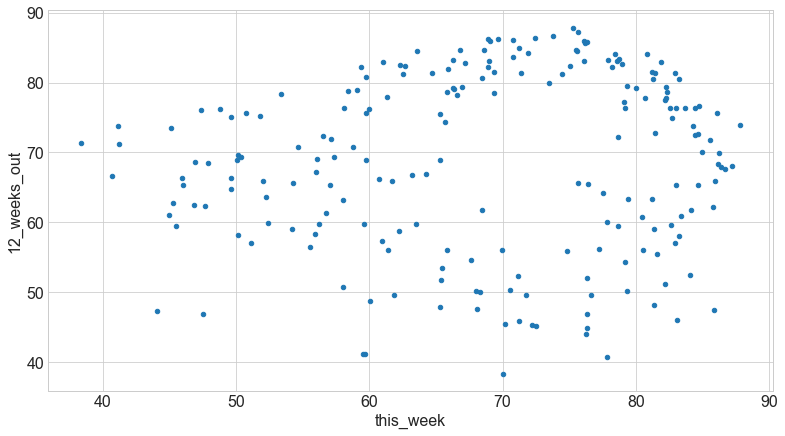

In [42]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,month,26_weeks_out
datetime,,,
2012-10-07,70.595201,10.000000,63.558611
2012-10-14,70.152821,10.000000,66.345532
2012-10-21,71.138375,10.000000,68.965502
2012-10-28,71.230464,10.000000,65.862071
2012-11-04,63.510554,10.571429,66.797107
...,...,...,...
2016-12-04,59.062094,11.571429,NaN
2016-12-11,48.163625,12.000000,NaN
2016-12-18,55.979132,12.000000,NaN


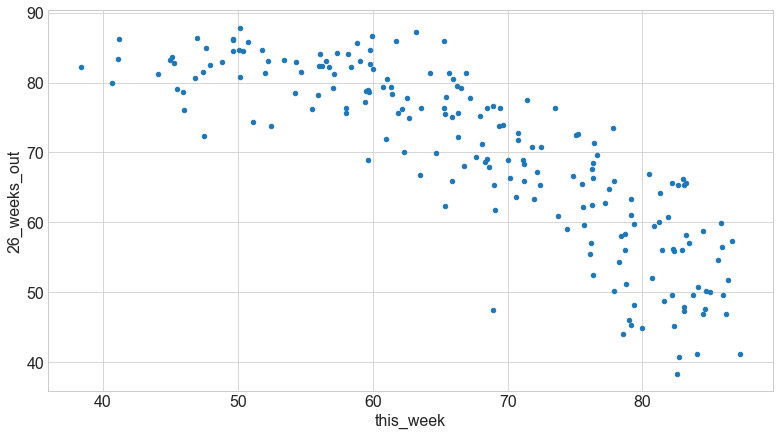

In [43]:
weekly = train.resample('W').mean()
weekly['26_weeks_out'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='26_weeks_out')
weekly

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

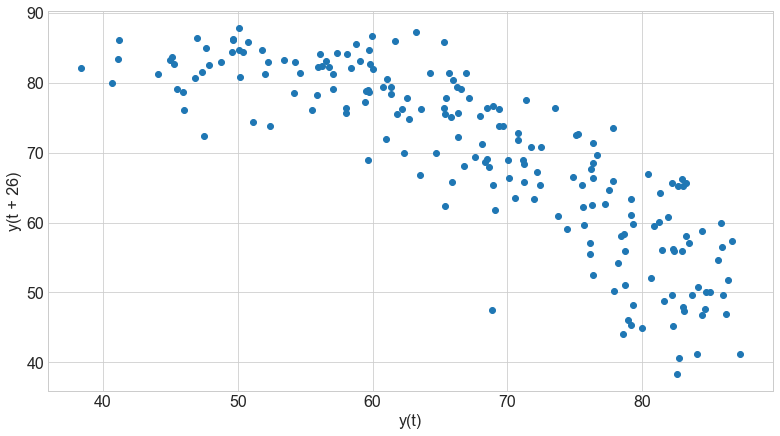

In [44]:
# easier way. Use pd.plotting.lag_plot(series, lag):

pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

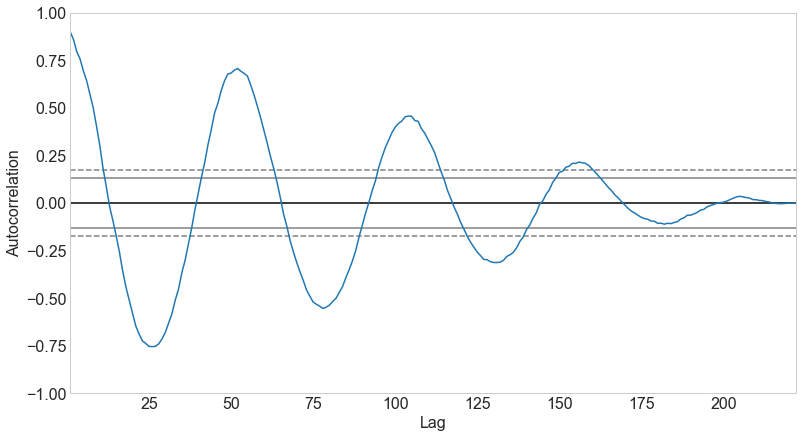

In [45]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())

### What does autocorrelation plot look like for white noise

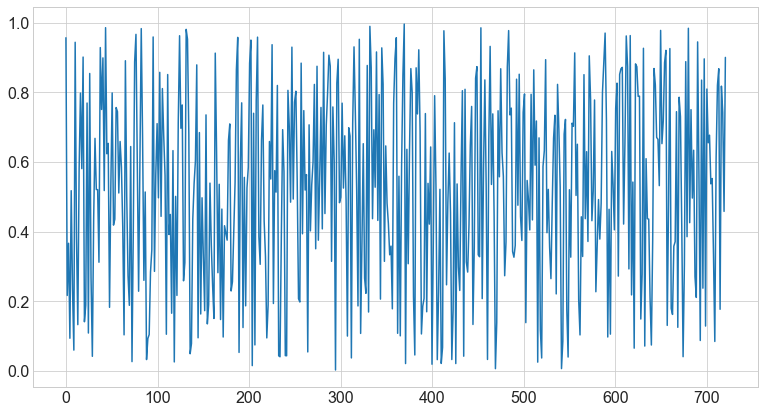

In [46]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
# result_curve =  noise
plt.plot(grid, noise)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


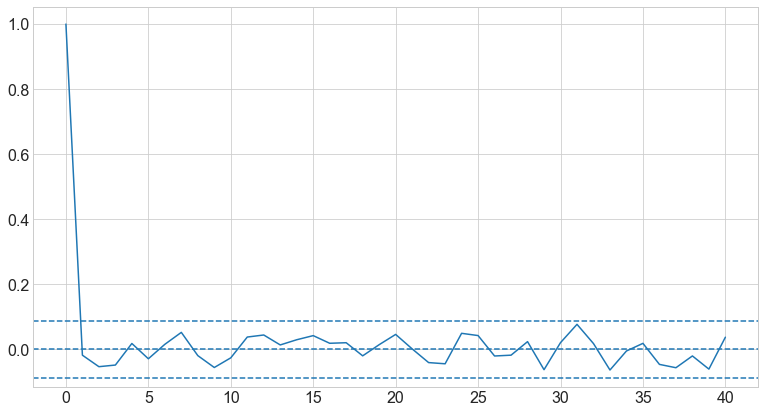

In [47]:
from statsmodels.tsa import stattools

acf_result = stattools.acf(noise)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(noise)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(noise)),linestyle='--')

### Another example of Autocorrelation

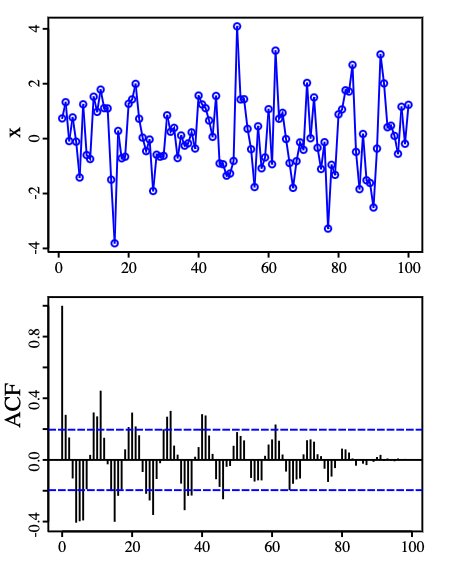

#### Visuals seasonal subseries plot and the box plot assume that the seasonal periods are known. However, if the seasonality period is not readlity apparent , the autocorrelation plot can help. 
#### If there is significant seasonality, the autocorrelation plot should show spikes at lags equal to the period.

### Seasonal Decomposition

$$ y = S + T + \epsilon $$

Seasonality + Trend + Residual

In [48]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [49]:
result.seasonal

datetime
2012-10-07     8.545501
2012-10-14     7.255470
2012-10-21     2.468309
2012-10-28     1.820126
2012-11-04    -0.114287
                ...    
2016-12-04   -14.650102
2016-12-11   -13.263237
2016-12-18   -12.765114
2016-12-25   -13.857895
2017-01-01   -24.587601
Freq: W-SUN, Name: seasonal, Length: 222, dtype: float64

In [50]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
datetime,,,,
2012-10-07,70.595201,NaN,8.545501,NaN
2012-10-14,70.152821,NaN,7.255470,NaN
2012-10-21,71.138375,NaN,2.468309,NaN
2012-10-28,71.230464,NaN,1.820126,NaN
2012-11-04,63.510554,NaN,-0.114287,NaN


<AxesSubplot:xlabel='datetime'>

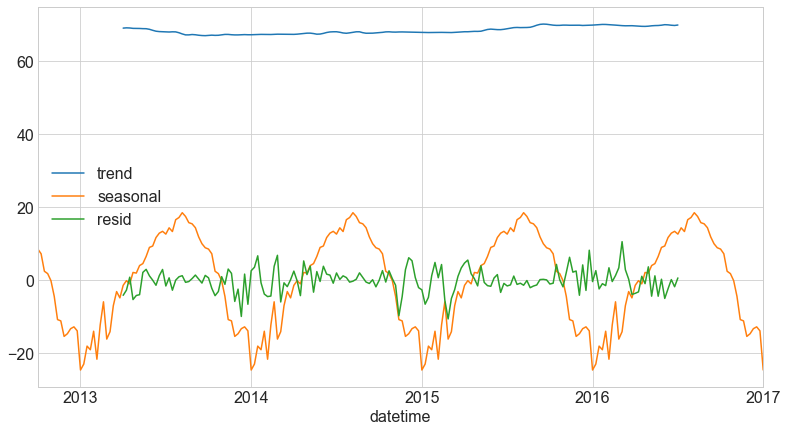

In [51]:
decomposition.iloc[:, 1:].plot()

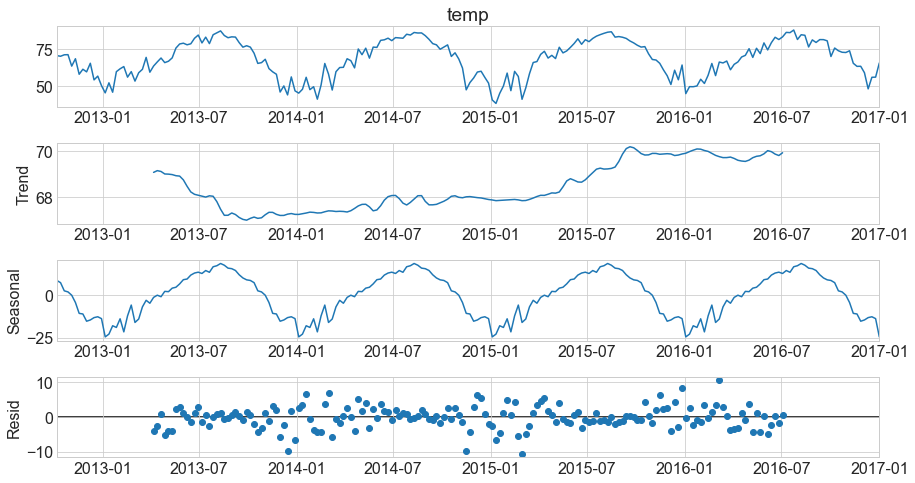

In [52]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Additive or multiplicative seasonality?


The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate. 


https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/

### Categories over time

In [53]:
train = train.resample('D').mean()
train.head()

,temp,month
datetime,,
2012-10-01,61.330942,10
2012-10-02,65.678822,10
2012-10-03,67.411250,10
2012-10-04,67.703750,10
2012-10-05,77.073125,10


In [54]:
# create a categorical feature
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').temp.mean()

temp_bin
cold    49.381699
cool    65.200219
warm    75.447977
hot     83.449087
Name: temp, dtype: float64

How can we visualize the temp_bin feature over time?

In [55]:
train.head()

,temp,month,temp_bin
datetime,,,
2012-10-01,61.330942,10,cool
2012-10-02,65.678822,10,cool
2012-10-03,67.411250,10,cool
2012-10-04,67.703750,10,cool
2012-10-05,77.073125,10,warm


Text(0, 0.5, '% of days in the month')

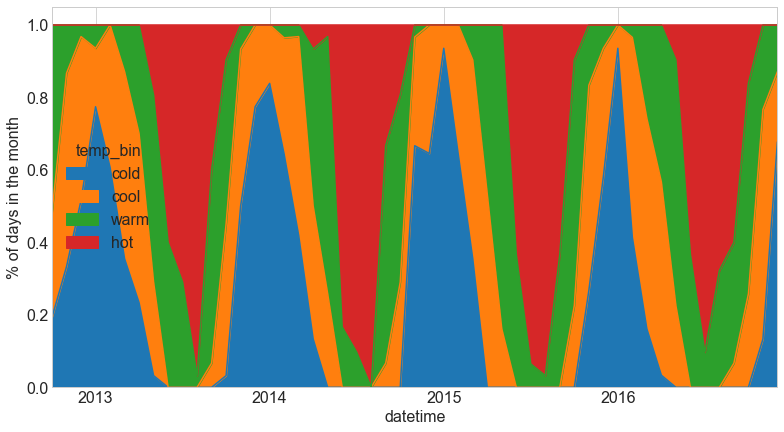

In [56]:
(train.groupby('temp_bin')
 .resample('M')
 .size() # like COUNT(*)
 .unstack(0) # turns an index level into columns
 .fillna(0)
 .astype(int)
 .apply(lambda row: row / row.sum(), axis=1) # raw nums to % of the row
 .plot.area()
)
plt.ylabel('% of days in the month')

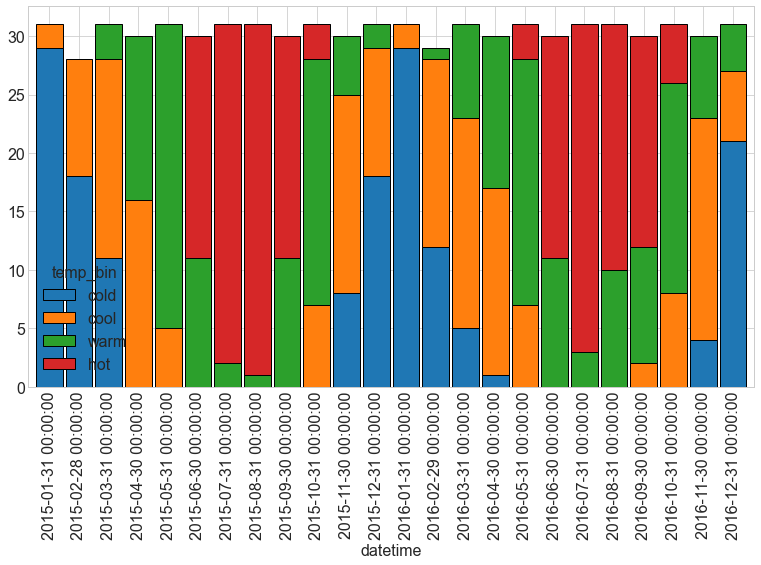

In [57]:
ax = (train['2015':'2016']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)

In [58]:
# take the existing labels, convert them to Timestamps, and then reformat with .strftime
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

### strftime

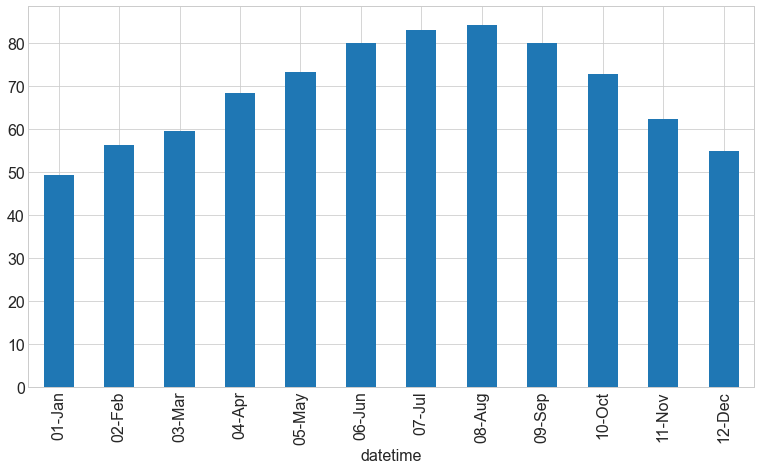

In [59]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()

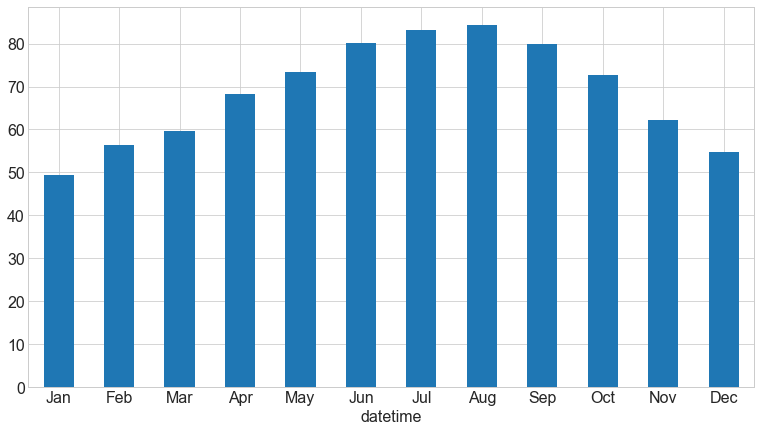

In [60]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);

### Matplotlib Dates
This will only work with plt.plot or ax.plot, not with the pandas plotting!

<AxesSubplot:xlabel='datetime'>

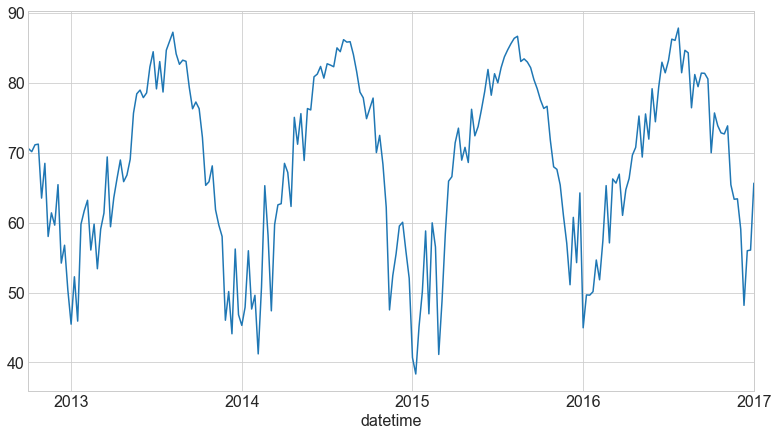

In [61]:
# how can i customize the x axis label here?

y.resample('W').mean().plot()

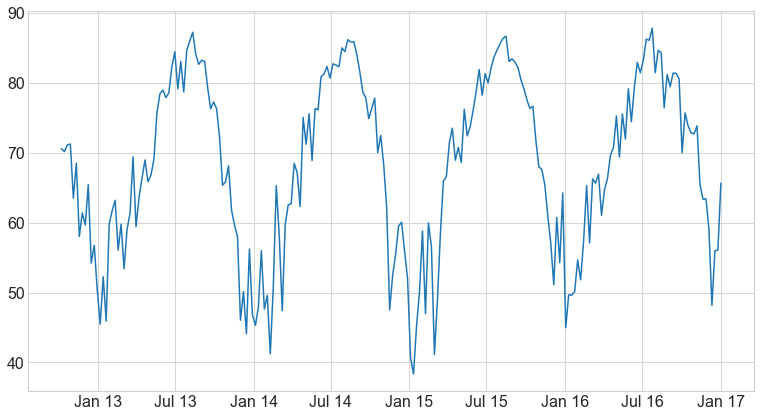

In [62]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))